In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly as ptly
import plotly.figure_factory as ff
from plotly import express as px

In [2]:
#df = pd.read_csv(r'C:\Users\allen.hoskins\OneDrive - Chick-fil-A, Inc\Documents\GitHub\archive\airline_merged.csv',low_memory = False)
df = pd.read_csv(r'/Users/allen/Documents/GitHub/ML7331-Lab1/airline_merged.csv',low_memory=False)

In [5]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Unnamed: 0,year,month,day,day_of_week,airline_cd,airline_name,flight_number,tail_number,origin_airport,airport_origin,city_origin,state_origin,country_origin,latitude_origin,longitude_origin,destination_airport,airport_destination,city_destination,state_destination,country_destination,latitude_destination,longitude_destination,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,0,2015,1,1,4,AS,Alaska Airlines Inc.,98,N407AS,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2015,1,1,4,AA,American Airlines Inc.,2336,N3KUAA,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2015,1,1,4,US,US Airways Inc.,840,N171US,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2015,1,1,4,AA,American Airlines Inc.,258,N3HYAA,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2015,1,1,4,AS,Alaska Airlines Inc.,135,N527AS,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#info on columns
df.info(show_counts = True, verbose = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 45 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             5819079 non-null  int64  
 1   year                   5819079 non-null  int64  
 2   month                  5819079 non-null  int64  
 3   day                    5819079 non-null  int64  
 4   day_of_week            5819079 non-null  int64  
 5   airline_cd             5819079 non-null  object 
 6   airline_name           5819079 non-null  object 
 7   flight_number          5819079 non-null  int64  
 8   tail_number            5804358 non-null  object 
 9   origin_airport         5819079 non-null  object 
 10  airport_origin         5332914 non-null  object 
 11  city_origin            5332914 non-null  object 
 12  state_origin           5332914 non-null  object 
 13  country_origin         5332914 non-null  object 
 14  latitude_origin   

<AxesSubplot:>

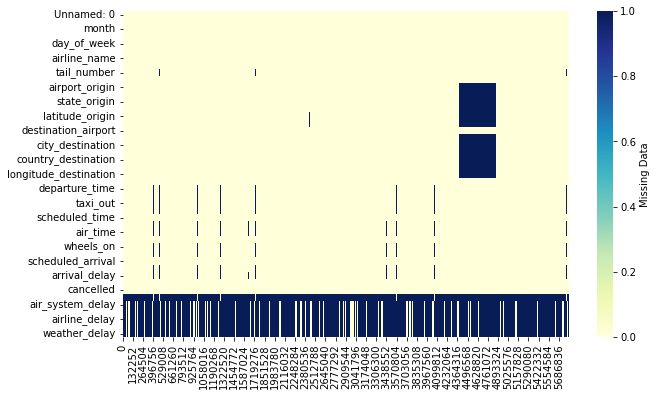

In [6]:
#plotting missing values
# code altered from: https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

<Figure size 720x432 with 0 Axes>

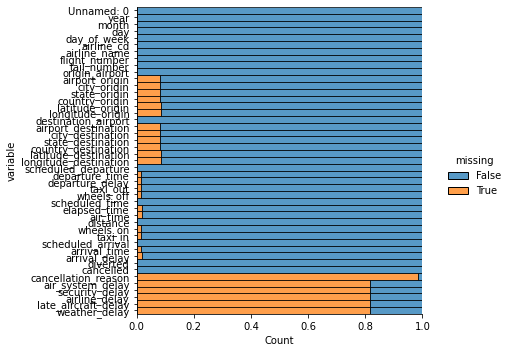

In [7]:
# code altered from: https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [3]:
#removing unwanted column from previous export
df.pop('Unnamed: 0')
#df.pop('cancellation_reason')

0                0
1                1
2                2
3                3
4                4
            ...   
5819074    5819074
5819075    5819075
5819076    5819076
5819077    5819077
5819078    5819078
Name: Unnamed: 0, Length: 5819079, dtype: int64

In [7]:
#Removing rows where Origin airport is NaN
df = df[df['airport_origin'].notna()]

In [10]:
#looking at counts after Nan Removal
df.info(verbose = True,show_counts =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332914 entries, 0 to 5819078
Data columns (total 43 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   year                   5332914 non-null  int64  
 1   month                  5332914 non-null  int64  
 2   day                    5332914 non-null  int64  
 3   day_of_week            5332914 non-null  int64  
 4   airline_cd             5332914 non-null  object 
 5   airline_name           5332914 non-null  object 
 6   flight_number          5332914 non-null  int64  
 7   tail_number            5318547 non-null  object 
 8   origin_airport         5332914 non-null  object 
 9   airport_origin         5332914 non-null  object 
 10  city_origin            5332914 non-null  object 
 11  state_origin           5332914 non-null  object 
 12  country_origin         5332914 non-null  object 
 13  latitude_origin        5328309 non-null  float64
 14  longitude_origin  

In [11]:
#Removing rows where Origin airport is NaN
df_test = df[df['departure_time','departure_delay','scheduled_time','arrival_time','arrival_delay','taxi_out','wheels_off'].notna()]

KeyError: ('departure_time', 'departure_delay', 'scheduled_time', 'arrival_time', 'arrival_delay', 'taxi_out', 'wheels_off')

<AxesSubplot:>

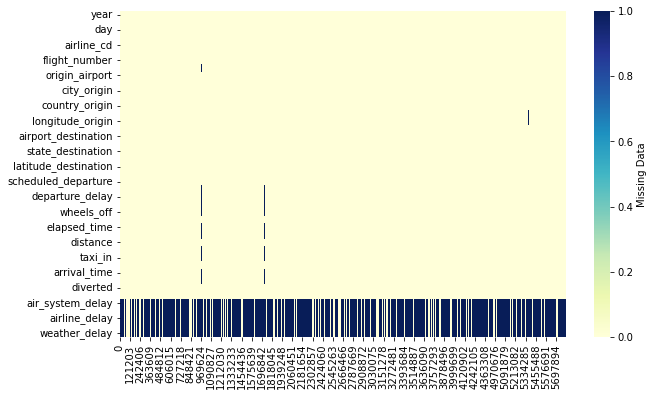

In [11]:
#plotting missing values after Nan Removal
# code altered from: https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

<Figure size 720x432 with 0 Axes>

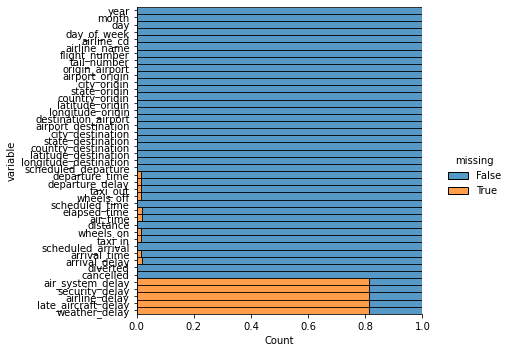

In [13]:
# code altered from: https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)


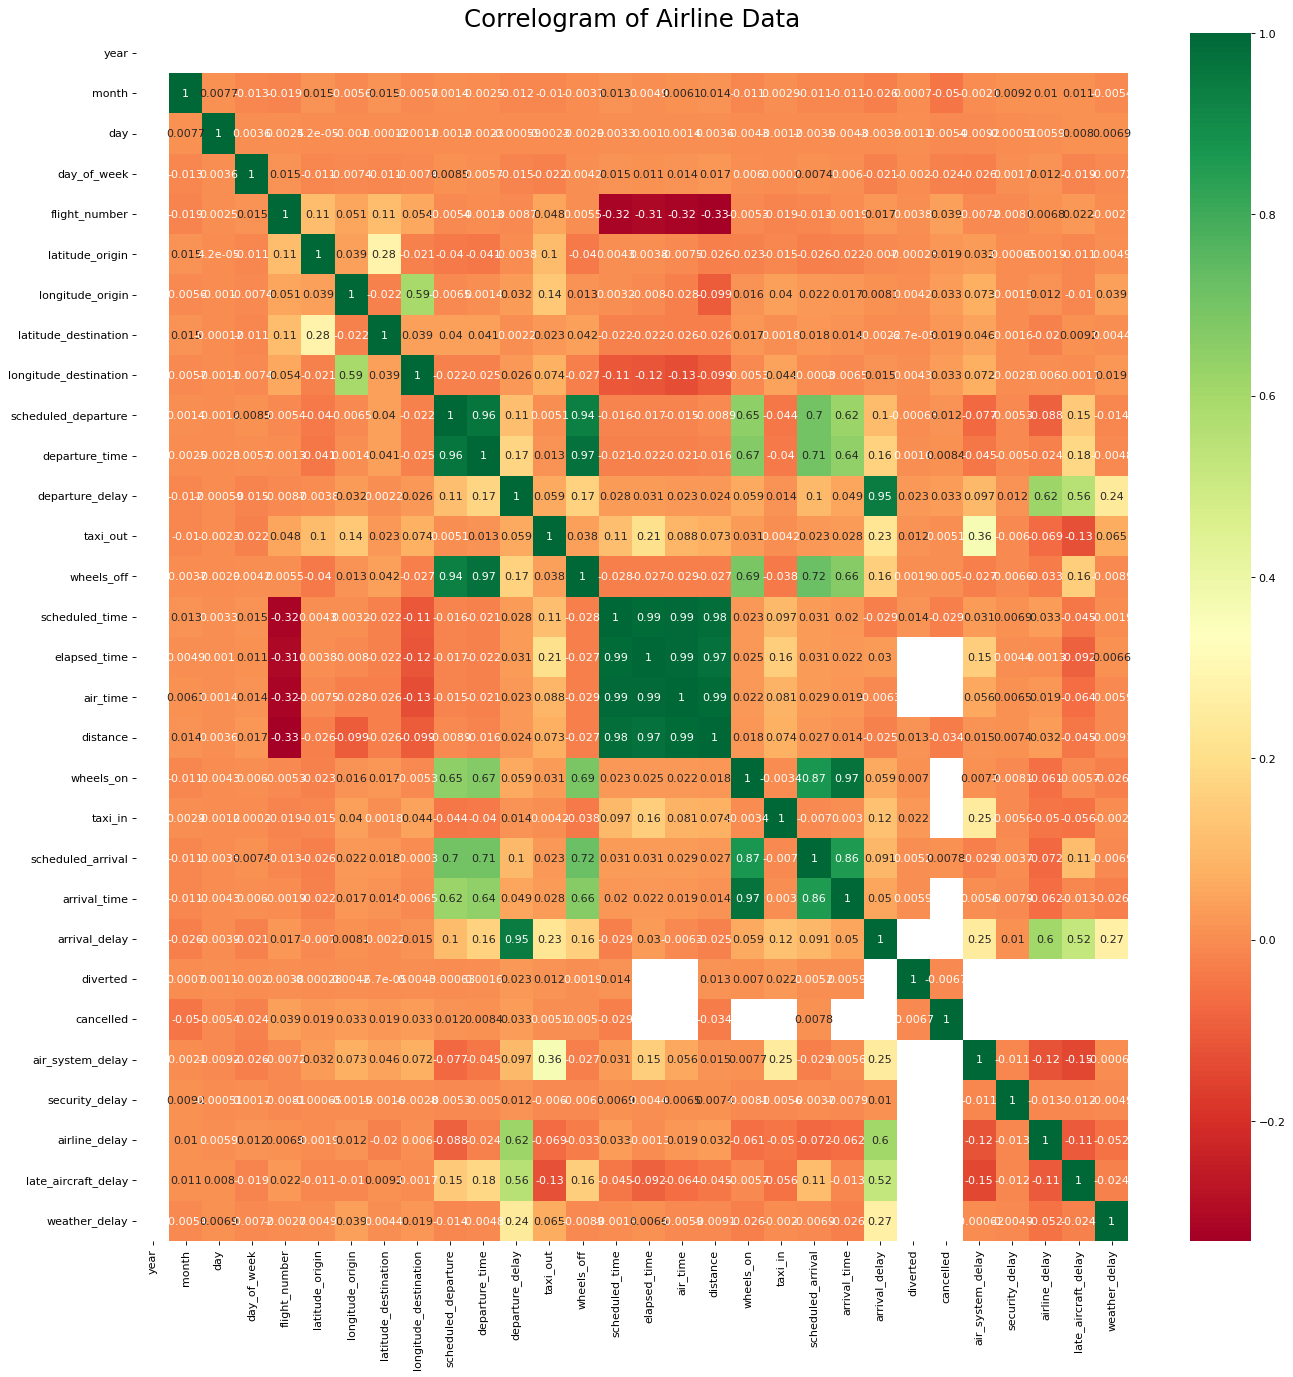

In [14]:
# plotting heatmap of numerical columns
plt.figure(figsize=(20,20), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', annot=True)

# addting titles and font sizes
plt.title('Correlogram of Airline Data', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [6]:
#plot where delayed on one graph and not delayed on another

df_delay_copy = df[df['departure_delay']>0].copy(deep=True)
df_early_copy = df[df['departure_delay']<0].copy(deep=True)

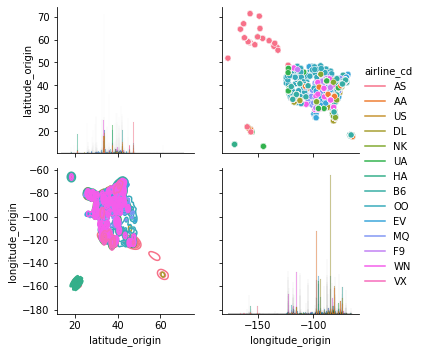

In [16]:
#scatter plot grid of delayed data
scatter_cols = ['year','month','day','day_of_week','flight_number','tail_number',
                'latitude_origin','longitude_origin','latitude_destination','longitude_destination',
                'scheduled_departure','departure_time','departure_delay','taxi_out','wheels_off','scheduled_time','elapsed_time',
                'air_time','distance','wheels_on','taxi_in','scheduled_arrival','arrival_time','arrival_delay','airline_cd']


pair_grid_pwr = sns.PairGrid(df[['latitude_origin','longitude_origin','airline_cd']], hue="airline_cd")
pair_grid_pwr.map_diag(sns.histplot)
pair_grid_pwr.map_upper(sns.scatterplot)
pair_grid_pwr.map_lower(sns.kdeplot)
pair_grid_pwr.add_legend()

In [ ]:
#scatter plot grid of non-delayed data
scatter_cols = ['year','month','day','day_of_week','flight_number','tail_number',
                'latitude_origin','longitude_origin','latitude_destination','longitude_destination',
                'scheduled_departure','departure_time','departure_delay','taxi_out','wheels_off','scheduled_time','elapsed_time',
                'air_time','distance','wheels_on','taxi_in','scheduled_arrival','arrival_time','arrival_delay','airline_cd']


pair_grid_pwr = sns.PairGrid(df_early_copy[scatter_cols], hue="airline_cd")
pair_grid_pwr.map_diag(sns.histplot)
pair_grid_pwr.map_upper(sns.scatterplot)
pair_grid_pwr.map_lower(sns.kdeplot)
pair_grid_pwr.add_legend()

In [ ]:
#ALTER FOR NEW COLUMNS
#dual histogram with rug
hist_data_age = [df.loc[df.satisfaction == 'satisfied'].age, df.loc[df.satisfaction == 'neutral or dissatisfied'].age]

group_labels = ['satisfied', 'neutral or dissatisfied']

# Create distplot with custom bin_size
fig_age = ff.create_distplot(hist_data_age, group_labels, bin_size=1, show_hist = True, show_rug = True)
fig_age.update_xaxes(range=[0, 100])
fig_age.update_layout(
    font_size = 15,
    title = 'Age histogram based on Satisfaction',
    title_font_size = 20,
    xaxis_title="Age",
    yaxis_title="Density")

fig_age.show()

In [ ]:
#Dual Violin Plot
sns.catplot(x='class',
               y = 'flight_distance',
               hue='gender',
               palette=['pink','blue'],
               split=True,
               kind = 'violin',
               col = 'satisfaction',
               data = df_cat,
               height =4,
               aspect = .7)

In [ ]:
plt.figure(figsize=(15, 10))
# Create violin plots without mini-boxplots inside.
ax = sns.violinplot(y='flight_distance',
                    x='class',
                    data=df,
                    color='green', 
                    cut=0,
                    inner=None)

# Clip the right half of each violin.
for item in ax.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width/2, height,
                       transform=ax.transData))

# Create strip plots with partially transparent points of different colors depending on the group.
num_items = len(ax.collections)
sns.stripplot(y='flight_distance',
              x='class',
              hue='satisfaction',
              data=df_cat,
              palette=['blue', 'deepskyblue'],
              alpha=0.4,
              size=7)

# Shift each strip plot strictly below the correponding volin.
for item in ax.collections[num_items:]:
    item.set_offsets(item.get_offsets() + 0.15)
    
# Create narrow boxplots on top of the corresponding violin and strip plots, with thick lines, the mean values, without the outliers.
sns.boxplot(y='flight_distance',
            x='class',
            data=df_cat,
            width=0.25,
            showfliers=False, showmeans=True, 
            meanprops=dict(marker='o', markerfacecolor='darkorange',
                           markersize=10, zorder=3),
            boxprops=dict(facecolor=(0,0,0,0), 
                          linewidth=3, zorder=3),
            whiskerprops=dict(linewidth=3),
            capprops=dict(linewidth=3),
            medianprops=dict(linewidth=3))

plt.legend(frameon=False, fontsize=15, loc='upper left')

In [4]:
non_numeric = df.select_dtypes(include = np.number).columns

In [1]:
non_numeric

NameError: name 'non_numeric' is not defined

In [ ]:
#Departure Delay
#couple fun graphs

#non-numerical columns
non_numeric = df.select_dtypes(include = np.number).columns

#altered from https://www.statology.org/one-hot-encoding-in-python/
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[non_numeric]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)

#view final df
head(final_df)

In [ ]:
#drop original columns
final_df.drop(non_numeric, axis=1, inplace=True)

head(final_df)

In [23]:
#logistic regression code altered from https://www.datacamp.com/tutorial/understanding-logistic-regression-python
#split dataset in features and target variable
feature_cols = df.loc[:, df.columns != 'departure_delay'].columns
X = df[feature_cols] # Features
y = df.departure_delay # Target variable

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [28]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

ValueError: could not convert string to float: 'B6'